<a href="https://colab.research.google.com/github/jfsalzmann/gasprices/blob/main/Actual_Sarimax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
# Import some libraries that we will use
!pip install pmdarima 

import pandas as pd
import matplotlib.pylab as plt
from pmdarima import auto_arima 


# Then read the file as a csv

df = pd.read_csv("https://raw.githubusercontent.com/jfsalzmann/gasprices/main/data-constr/actual_sarima.csv",
                 index_col = 'date',
                 parse_dates = True).asfreq('D')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
#training and testing 

train_y = df.iloc[:-150,]
test_y = df.iloc[-150:,]
train_X = df.iloc[:-150,]
test_X = df.iloc[-150:,]



In [117]:
model = auto_arima(y = train_y,
                   X = train_X,
                   m = 7 )

# 7 smallest seasonsal data there is = days 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels

TypeError: ignored

In [108]:
#Predict

predictions = pd.Series(model.predict(n_periods = 150,
              X = test_X))



predictions


2022-06-11    1.244871e+09
2022-06-12    1.246231e+09
2022-06-13    1.554523e+09
2022-06-14    1.653579e+09
2022-06-15    1.539015e+09
                  ...     
2022-11-03    2.225769e+09
2022-11-04    2.352266e+09
2022-11-05    2.269292e+09
2022-11-06    2.289426e+09
2022-11-07    2.318061e+09
Freq: D, Length: 150, dtype: float64

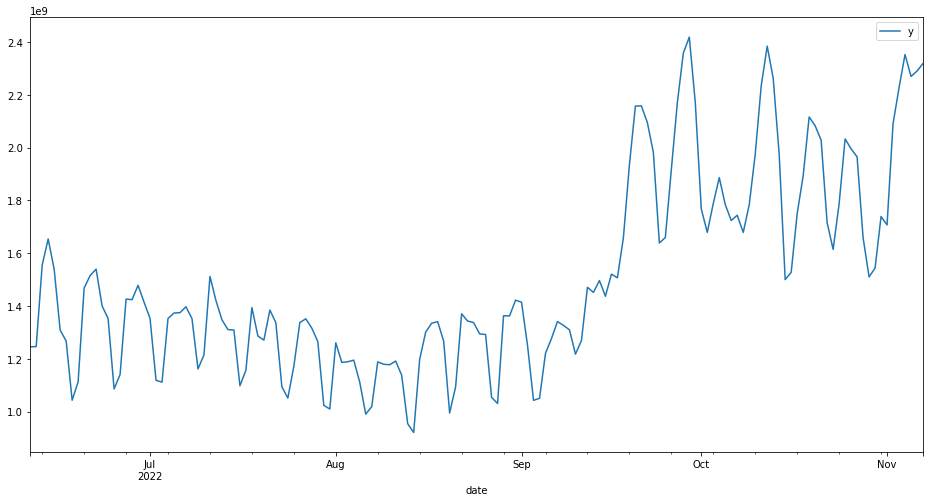

In [110]:
test_y.plot(figsize = (16,8),legend = True)



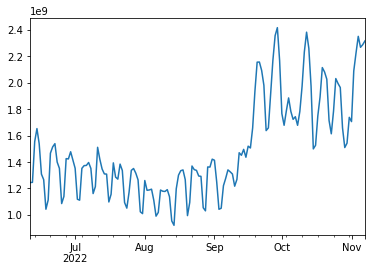

In [109]:

predictions.plot()